# Alpha checker
Checks whether the alpha for btprinter is still there

In [1]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import model as m
import ui
from datetime import datetime, timedelta
import math
import importlib
importlib.reload(m)


<module 'model' from '/Users/SunnyNie/Documents/Investing/metagame/deprecated/btprinter/model.py'>

In [2]:
df = m.get_backtesting_df(progress=True, sleep=0.1, save=True)

 |██████████████████████████████████████████████████| 100.0% 


In [3]:
pct = (df - df.shift(1))/df.shift(1)
pct.drop("busd", inplace=True, axis=1)
pct.dropna(how="all", inplace=True)
pct = pct.iloc[1:-1]
pct_ = pct.resample("2H", offset=timedelta(hours=0)).sum().replace(0, np.nan) # Set offset hours=1 or 0

In [4]:
btc = pct_['btc']
pct_.drop("btc", inplace=True, axis=1)

In [5]:
pct_r = list(map(lambda x: pct_.iloc[x].sort_values(ascending=False).index, range(len(pct_))))

In [6]:
best = pct_r.copy()
best.insert(0, best[-1])
del best[-1]

In [7]:
best = list(map(lambda x: list(filter(lambda y: y not in ['gbp', 'eur'], x)), best))
# best[-1][1]

In [8]:
def get_returns(pct, best):
    returns = [0, 0]
    pret = [0, 0]
    trades = ["", ""]
    total = len(pct)
    for i in range(2, total):
        prev_ret = pct.iloc[i-1][best[i][0]]
        row = pct.iloc[i]
        gain = row[best[i][0]]
        if np.isnan(gain):
            gain = 0
            trades.append("")
        else: 
            trades.append(best[i][0])
        returns.append(-gain)
        pret.append(prev_ret)
        ui.printProgressBar(i, total)
    return returns, pret, trades


In [9]:
returns, pret, trades = get_returns(pct_, best)

In [10]:
list(map(lambda x: x[0], best[-8:]))

['forth', 'rad', 'forth', 'oxt', 'rare', 'jasmy', 'oxt', 'fio']

In [11]:
r = list(map(lambda x: x-0.004 if x != 0 else x, returns))
i = -1
b = [i-1000,None]

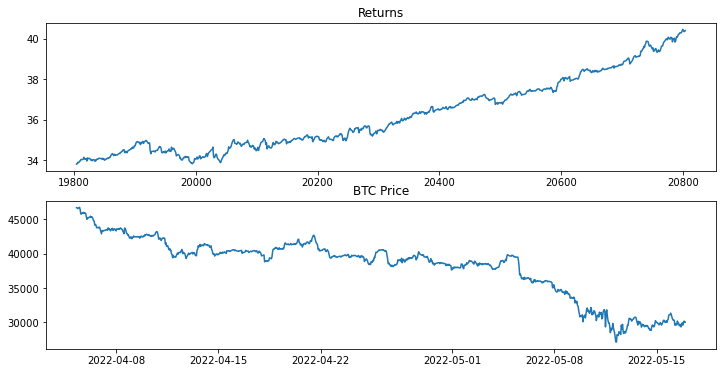

In [12]:
cumsum = pd.Series(r).cumsum()[b[0]:b[1]]
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(cumsum)
ax[1].plot(df.iloc[b[0]:b[1]].btc)
ax[0].set_title("Returns")
ax[1].set_title("BTC Price");


# cumsum.plot()